In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/monthly_milk_production - monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [ ]:
df.head(3)

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640


<Axes: xlabel='Date'>

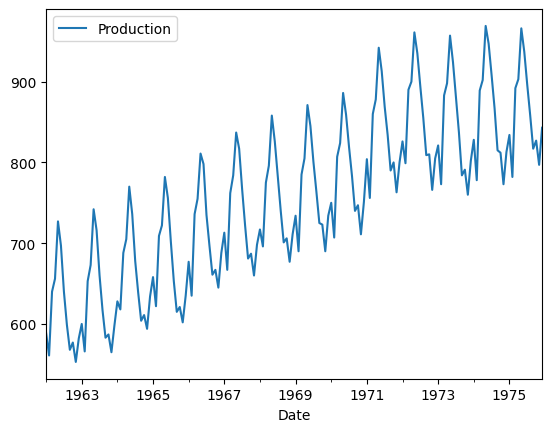

In [ ]:
df.plot()

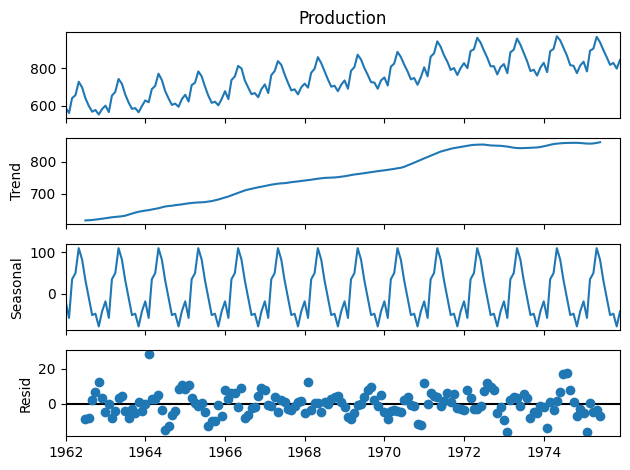

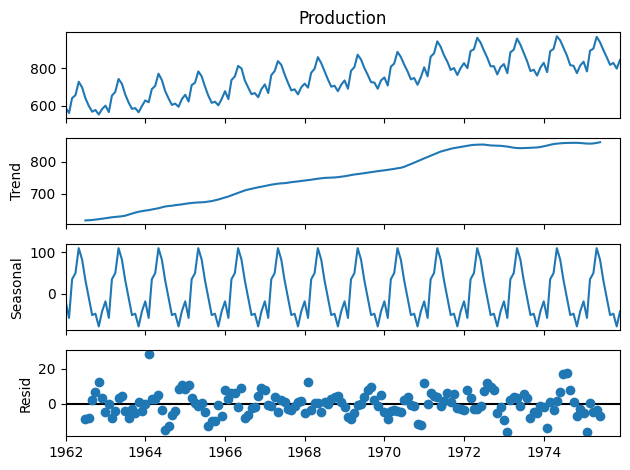

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(df['Production'])
results.plot()

In [ ]:
len(df)

168

In [ ]:
train=df.iloc[:156]
test=df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
import keras
print(keras.__version__)

3.6.0


In [ ]:
!pip install --upgrade keras tensorflow

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
#define generator
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [ ]:
x,y=generator[0]
print(f'Given the Array: \n{x.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
n_input=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
#define Model
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#fit model
model.fit(generator,epochs=10)

Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0032
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0038
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0037
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0037
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0031
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0038
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0032
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0026
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0052
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0032


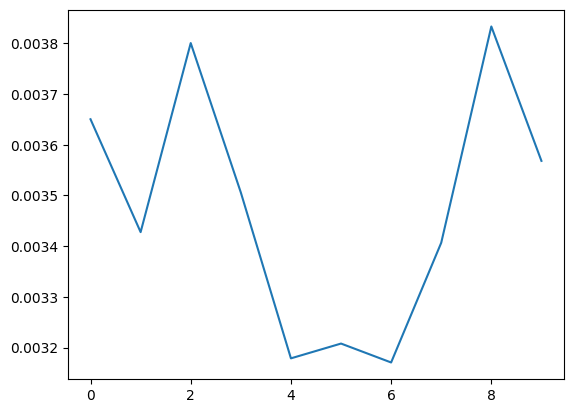

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch=scaled_train[-12:]
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


array([[0.630544]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

<ipython-input-28-69510ee3e1ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

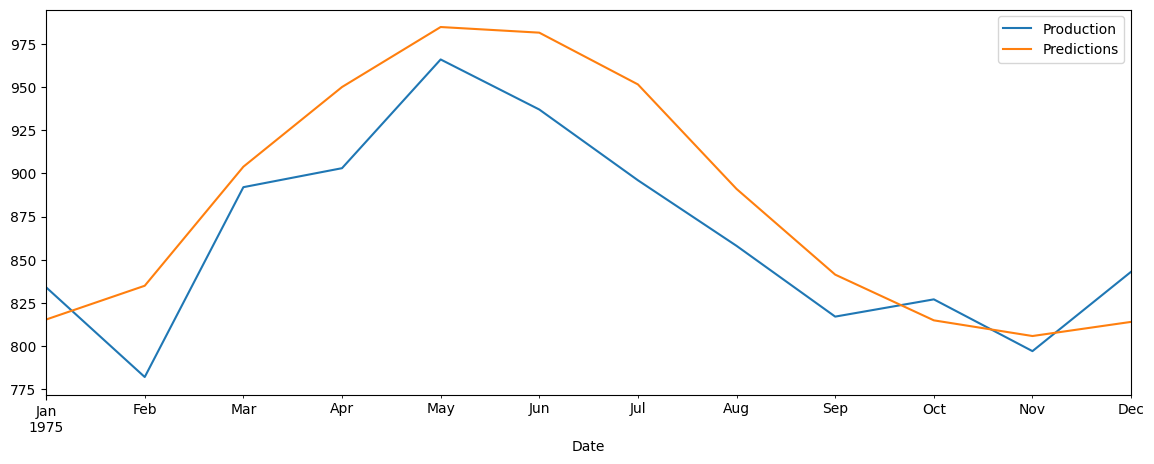

In [ ]:
test['Predictions'] = true_predictions
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

33.7487595392903
